In [34]:
import pandas as pd
import numpy as np
import os
from sklearn.datasets import load_iris
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

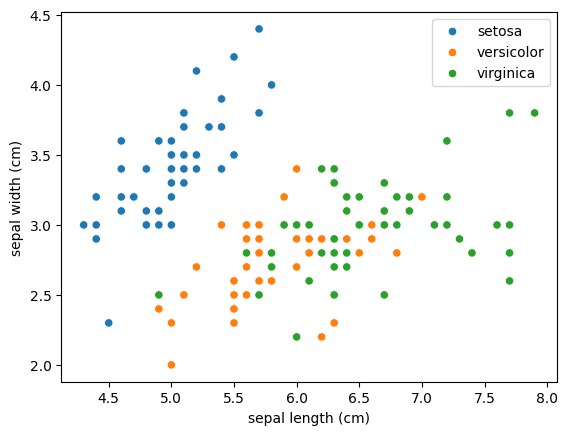

In [8]:
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue=iris.target_names[iris.target])

In [23]:
X, y = StandardScaler().fit_transform(iris.data), iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [31]:
class KNN_classifier:
    def __init__(self, X, y, metric, k=3):
        self.k = k
        self.metric = metric
        self.X_train = X
        self.y_train = y

    '''
    def get_euclidean_distance(self, p, q):
        #return np.linalg.norm(p - q)
        return math.dist(p, q)
    '''
    # Euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1-v2)**2))

    # Manhattan distance (l1 norm)
    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1-v2))

    # Minkowski distance (lp norm)
    def minkowski(self, v1, v2, p=2):
        return np.sum(np.abs(v1-v2)**p)**(1/p)

    # Make predictions
    def predict(self, X_test):
        preds = []
        # Loop over rows in test set
        for test_row in X_test:
            nearest_neighbours = self.get_neighbours(test_row)
            # Check the mode of the target values, as this is a classification problem.
            # Mode result returns mode value and count.
            # mode_result.mode.ndim == 1 denotes single mode.
            # mode_result.mode.ndim > 1 denotes multi modal.
            mode_result = stats.mode(nearest_neighbours)
            majority = mode_result.mode[0] if mode_result.mode.ndim == 1 else mode_result.mode
            preds.append(majority)
        return np.array(preds)

    # Get nearest neighbours
    def get_neighbours(self, test_row):
        distances = list()

        # Calculate distance to all points in X_train with X_test
        for (train_row, train_class) in zip(self.X_train, self.y_train):
            if self.metric=='euclidean':
                dist = self.euclidean(train_row, test_row)
            elif self.metric=='manhattan':
                dist = self.manhattan(train_row, test_row)
            elif self.metric=='minkowski':
                dist = self.minkowski(train_row, test_row, self.p)
            else:
                raise NameError('Supported metrics are euclidean, manhattan and minkowski')
            # Append the distrance and distance class as a tuple to the list
            distances.append((dist, train_class))
        #print(distances)
        # Sort distances based on the distance
        distances.sort(key=lambda x: x[0])

        # Identify k nearest neighbours
        # It takes the target value of each k nearest neighbors.
        neighbours = list()
        for i in range(self.k):
            neighbours.append(distances[i][1])

        return neighbours

In [32]:
# Function to calculate accuracy
def accuracy(preds, y_test):
    return 100 * (preds == y_test).mean()

In [33]:
# Apply our kNN algorithm
for metric in ['euclidean', 'manhattan']:
    clf = KNN_classifier(X_train, y_train, k=5, metric=metric)
    preds = clf.predict(X_test)
    print(f'Metric: {metric}, accuracy: {accuracy(preds, y_test):.3f} %')

Metric: euclidean, accuracy: 93.333 %
Metric: manhattan, accuracy: 93.333 %


In [35]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(f'Sklearn accuracy: {accuracy(preds, y_test):.3f} %')

Sklearn accuracy: 93.333 %
